In [1]:
# 구글 드라이브 마운트(cjyjob1993@gmail.com)
from google.colab import drive
drive.mount('/content/drive')

# lib 디렉토리를을 환경 변수에 추가
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/myCode/lib')

Mounted at /content/drive


In [2]:
# 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# 커스텀 라이브러리 임포트
import numpy_fixSeed
from func_debug_log import debug

In [3]:
# debug_log (0 : 미출력, 1 : 출력)
debug_flag = 1

# 퍼셉트론

입력층과 출력층으로 이루어진 단층 신경망.

## XOR 게이트 문제
선형 경계만을 만들 수 있어, XOR문제를 효과적으로 해결할 수 없다.

In [4]:
if debug_flag == 1 : debug('XOR 예시 데이터 만들기', __name__)

x11 = np.random.uniform(low=0, high=5, size=(50,))
x12 = np.random.uniform(low=10, high=15, size=(50,))
x21 = np.random.uniform(low=0, high=5, size=(50,))
x22 = np.random.uniform(low=10, high=15, size=(50,))

x1 = np.append(x11, x12)
x2 = np.append(x21, x22)

y11 = np.random.uniform(low=10, high=15, size=(50,))
y12 = np.random.uniform(low=0, high=5, size=(50,))
y21 = np.random.uniform(low=0, high=5, size=(50,))
y22 = np.random.uniform(low=10, high=15, size=(50,))

y1 = np.append(y11, y12)
y2 = np.append(y21, y22)

x_1 = np.vstack([x1, y1]).T
x_2 = np.vstack([x2, y2]).T
y_1 = np.ones_like(x_1[:, 0])
y_2 = np.zeros_like(x_2[:, 0])
x = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])

2022.12.02 01:24:40 __main__ XOR 예시 데이터 만들기


2022.12.02 01:24:40 __main__ XOR 예시 데이터 시각화


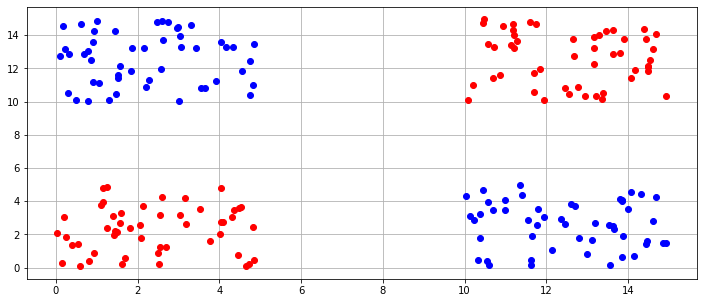

In [5]:
if debug_flag == 1 : debug('XOR 예시 데이터 시각화', __name__)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x_1[:, 0], x_1[:, 1], 'bo')
ax.plot(x_2[:, 0], x_2[:, 1], 'ro')
ax.grid()

In [6]:
if debug_flag == 1 : debug('신경망 모델 구축', __name__)

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

2022.12.02 01:24:40 __main__ 신경망 모델 구축


In [7]:
if debug_flag == 1 : debug('신경망 모델 컴파일', __name__)

model.compile(optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

2022.12.02 01:24:40 __main__ 신경망 모델 컴파일


In [8]:
if debug_flag == 1 : debug('신경망 모델 학습', __name__)

model.fit(x, y, epochs=10)

2022.12.02 01:24:40 __main__ 신경망 모델 학습
Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 3.4672 - accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 1.7703 - accuracy: 0.5500
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.9614 - accuracy: 0.6650
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7962 - accuracy: 0.5850
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7298 - accuracy: 0.4700
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.4050
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.3300
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5050
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.3900
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.4550


In [10]:
if debug_flag == 1 : debug('신경망 모델 예측 수행', __name__)

preds = model.predict(x) # 입력값 x에 대한 예측 수행
preds_1d = preds.flatten() # 1차원으로 변환
pred_class = np.where(preds_1d > 0.5, 1, 0) # 예측값을 0.5를 기준으로 0, 1로 변환

y_true = x[pred_class == 1]
y_false = x[pred_class == 0]


2022.12.02 01:24:40 __main__ 신경망 모델 예측 수행
7/7 [==============================] - 0s 2ms/step


2022.12.02 01:24:40 __main__ 신경망 모델 예측 결과 시각화


<bound method _AxesBase.grid of <matplotlib.axes._subplots.AxesSubplot object at 0x7f4f0d2ae2e0>>

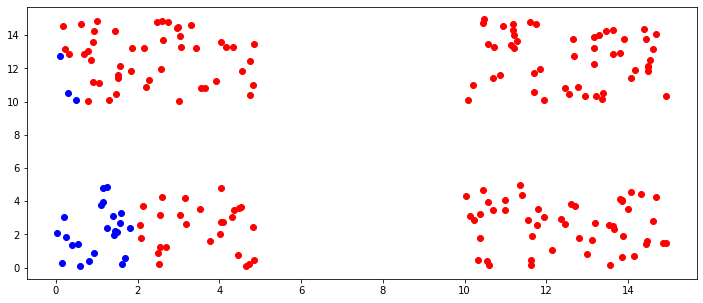

In [11]:
if debug_flag == 1 : debug('신경망 모델 예측 결과 시각화', __name__)

fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(y_true[:, 0], y_true[:, 1], 'bo')
ax.plot(y_false[:, 0], y_false[:, 1], 'ro')
ax.grid